In [1]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

In [2]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

data = np.loadtxt("dataset_4_9_training.csv", delimiter=",")

# extracting the first column which contains the labels
data_labels = data[:, :1].reshape(data.shape[0],)
# extracting all the columns but the first which are our features
data_features = data[:, 1:]

In [3]:


# creating a dataframe using pandas only for the purpose fo plotting
df = pd.DataFrame({'Component 0':data_features[:,0], 'Component 1':data_features[:,1], 
                   'Component 2':data_features[:,2], 'label':data_labels})

fig = px.scatter_3d(df, x='Component 0', y='Component 1', z='Component 2', color='label')
fig.show()

In [4]:
"""
### WRITE YOUR CODE BETWEEN THESE LINES - START
# Percentage of corpus considered for training
corp_perc = 4

# Calculating the total number of samples
corp_split = int(corp_perc * data.shape[0] // 100)

# Choosing random samples from data points corresponind to four and nine
four_indices = np.random.choice(np.arange(data.shape[0]//2), corp_split//2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0]//2, data.shape[0]), corp_split//2, replace=False)
my_data_four = np.copy(data[four_indices])
my_data_nine = np.copy(data[nine_indices])

# Forming data set with samples of fours and nines
my_data = np.concatenate((my_data_four, my_data_nine))
test_perc = 5
semi_split = int(test_perc*my_data.shape[0]//200)

# Creating training and testing input dictionaries
training_input = {'A': my_data_four[:-semi_split, 1:], 'B': my_data_nine[:-semi_split, 1:]}
test_input = {'A': my_data_four[-semi_split:, 1:], 'B': my_data_nine[-semi_split:, 1:]}
testing_input = np.concatenate((my_data_four[-semi_split:, 1:], my_data_nine[-semi_split:, 1:]))
testing_labels = np.concatenate((my_data_four[-semi_split:, :1], my_data_nine[-semi_split:, :1]))

# Prepare the training and testing datasets
x_train = np.concatenate((training_input['A'], training_input['B']))
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))
"""

### WRITE YOUR CODE BETWEEN THESE LINES - START
# Percentage of corpus considered for training
corp_perc = 80

# Calculating the total number of samples
corp_split = int(corp_perc * data.shape[0] // 100)

# Choosing random samples from data points corresponding to fours and nines
four_indices = np.random.choice(np.arange(data.shape[0]//2), corp_split//2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0]//2, data.shape[0]), corp_split//2, replace=False)
my_data_four = np.copy(data[four_indices])
my_data_nine = np.copy(data[nine_indices])

# Forming data set with samples of fours and nines
my_data = np.concatenate((my_data_four, my_data_nine))

# Calculate the number of samples for testing (40%)
test_perc = 100 - corp_perc
semi_split = int(test_perc * my_data.shape[0] // 100)

# Creating training and testing input dictionaries
training_input = {'A': my_data_four[:-semi_split, 1:], 'B': my_data_nine[:-semi_split, 1:]}
test_input = {'A': my_data_four[-semi_split:, 1:], 'B': my_data_nine[-semi_split:, 1:]}
testing_input = np.concatenate((my_data_four[-semi_split:, 1:], my_data_nine[-semi_split:, 1:]))
testing_labels = np.concatenate((my_data_four[-semi_split:, :1], my_data_nine[-semi_split:, :1]))

# Prepare the training and testing datasets
x_train = np.concatenate((training_input['A'], training_input['B']))
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))

print(x_train,y_train,x_test,y_test)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import *
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.primitives import Sampler

# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Estimator, Sampler, Session

# Add your token below
service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend("ibmq_qasm_simulator")

session = Session(backend=backend)

estimator = Estimator(session=session)
sampler = Sampler(session=session)

import pandas as pd
import seaborn as sns
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

In [6]:
%%write_and_run feature_map.py

import numpy as np
from qiskit import QuantumCircuit 
from qiskit.circuit import ParameterVector

def feature_map(num_qubits): 
    reps = 3
    feature_map_circuit = QuantumCircuit(num_qubits)
    x = ParameterVector('x', length=num_qubits)

    for _ in range(reps):
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
        feature_map_circuit.barrier()
        for control in range(num_qubits-1, 0, -1):
            target = control - 1
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.cx(control, target)
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.barrier()
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
        feature_map_circuit.barrier()

    return feature_map_circuit, num_qubits


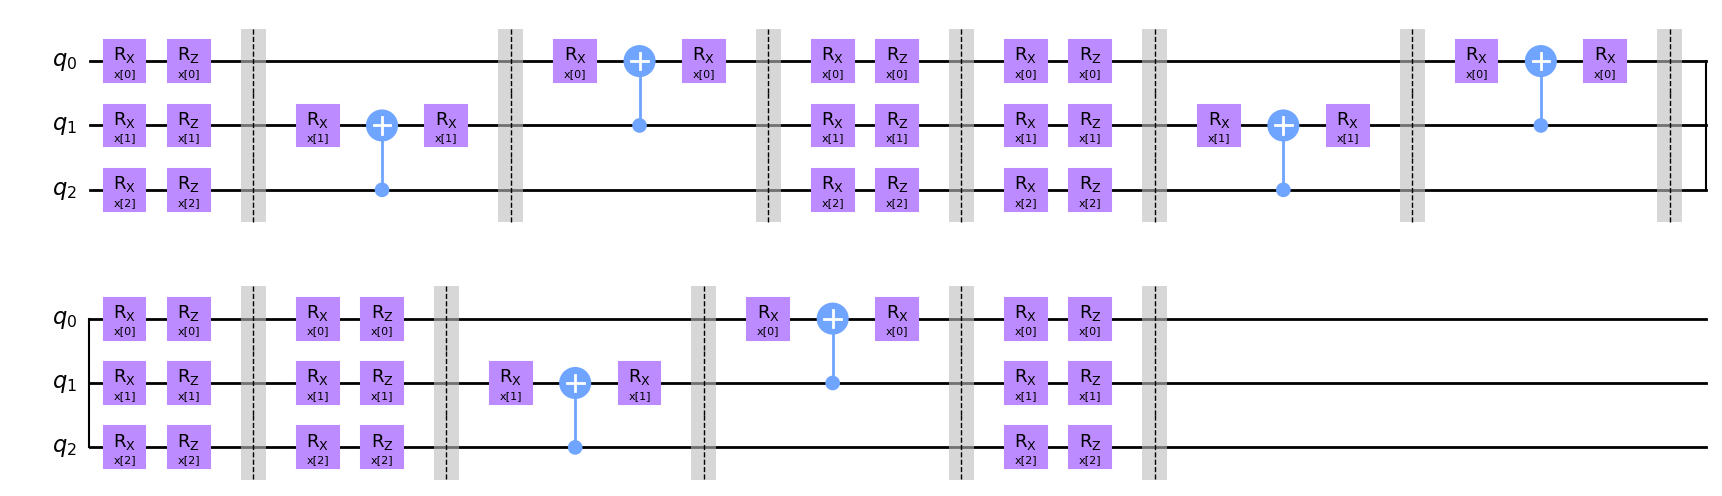

In [7]:
feature_map_circuit, num_qubits = feature_map(num_qubits=3)
feature_map_circuit.draw(output='mpl', style='clifford')

In [ ]:
feature_map_circuit.depth()

In [8]:
"""
%%write_and_run feature_map.py

### WRITE YOUR CODE BETWEEN THESE LINES - END
def feature_map(): 
    from qiskit.circuit.library import FeatureMap
    from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
    
    # This thing is deprecated, so you should use ParameterVector as given in var_circuit
    class CustomFeatureMap(FeatureMap):
        def __init__(self,feature_dimension) :
            self._support_parameterized_circuit = False
            self._feature_dimension = feature_dimension
            self._num_qubits = self._feature_dimension = feature_dimension
 
        def construct_circuit(self, x, qr, inverse=False):
            qc = QuantumCircuit(qr)
            
            qc.ry(1.5707963267948966 - ( -6.281944 -18.2581792128*x[0] -5.0668916734*x[1] -8.1953145118*x[2] -15.2349681566*x[0]*x[0] +11.3057976348*x[0]*x[1] -1.3337662124*x[0]*x[2] -8.7964876874*x[1]*x[1] +15.8104898953*x[1]*x[2] -17.9647013838*x[2]*x[2] -1.6288643784*x[0]*x[0]*x[0] +26.5142568935*x[0]*x[0]*x[1] +12.8639794236*x[0]*x[0]*x[2] +6.5869361729*x[0]*x[1]*x[1] -34.5638370939*x[0]*x[1]*x[2] +4.3278564462*x[0]*x[2]*x[2] -19.6251756989*x[1]*x[1]*x[1] +18.3627653027*x[1]*x[1]*x[2] +43.6666785257*x[1]*x[2]*x[2] -26.1820389079*x[2]*x[2]*x[2] +7.6670952046*x[0]*x[0]*x[0]*x[0] +20.3816390262*x[0]*x[0]*x[0]*x[1] +9.6234097668*x[0]*x[0]*x[0]*x[2] +22.7686519570*x[0]*x[0]*x[1]*x[1] -26.1590873249*x[0]*x[0]*x[1]*x[2] +24.6413406682*x[0]*x[0]*x[2]*x[2] -21.2953111914*x[0]*x[1]*x[1]*x[1] -37.4776585966*x[0]*x[1]*x[1]*x[2] -20.8506241526*x[0]*x[1]*x[2]*x[2] -3.7733865767*x[0]*x[2]*x[2]*x[2] -15.0712267769*x[1]*x[1]*x[1]*x[1] +6.3995083646*x[1]*x[1]*x[1]*x[2] +40.6835629654*x[1]*x[1]*x[2]*x[2] +39.3196783560*x[1]*x[2]*x[2]*x[2] -19.7886414821*x[2]*x[2]*x[2]*x[2] +8.4877476943*x[0]*x[0]*x[0]*x[0]*x[0] -15.1737293593*x[0]*x[0]*x[0]*x[0]*x[1] -26.8990646648*x[0]*x[0]*x[0]*x[0]*x[2] +1.6981790673*x[0]*x[0]*x[0]*x[1]*x[1] -8.5431553637*x[0]*x[0]*x[0]*x[1]*x[2] +2.5578560787*x[0]*x[0]*x[0]*x[2]*x[2] -15.2496951964*x[0]*x[0]*x[1]*x[1]*x[1] +21.8675154000*x[0]*x[0]*x[1]*x[1]*x[2] +4.5748045146*x[0]*x[0]*x[1]*x[2]*x[2] +15.7023342300*x[0]*x[0]*x[2]*x[2]*x[2] -2.5174868005*x[0]*x[1]*x[1]*x[1]*x[1] +29.4921400045*x[0]*x[1]*x[1]*x[1]*x[2] +0.9710870844*x[0]*x[1]*x[1]*x[2]*x[2] -8.2668409487*x[0]*x[1]*x[2]*x[2]*x[2] -10.7140495204*x[0]*x[2]*x[2]*x[2]*x[2] +13.9235124213*x[1]*x[1]*x[1]*x[1]*x[1] +1.2204856418*x[1]*x[1]*x[1]*x[1]*x[2] -24.8268446003*x[1]*x[1]*x[1]*x[2]*x[2] -23.5183173193*x[1]*x[1]*x[2]*x[2]*x[2] -8.0515085348*x[1]*x[2]*x[2]*x[2]*x[2] +18.2553944912*x[2]*x[2]*x[2]*x[2]*x[2] -15.8572320344*(1.0/x[0]) +50.5872979244*(1.0/x[1]) -26.2705393860*(1.0/x[2]) -4.2886896520*(x[0]/x[1]) -27.2495771466*(x[0]/x[2]) -13.7706855069*(x[1]/x[0]) +59.5328442789*(x[1]/x[2]) +11.2854417732*(x[2]/x[0]) -12.3196055026*(x[2]/x[1]) )
                
                ,0)
            qc.ry(1.5707963267948966 - ( -4.598604 -19.2641052455*x[0] +3.6476373695*x[1] -18.7749495708*x[2] -18.3607945782*x[0]*x[0] +19.6453871196*x[0]*x[1] +5.1369221080*x[0]*x[2] -6.3901931103*x[1]*x[1] +20.5265671384*x[1]*x[2] -25.5707060682*x[2]*x[2] -16.2225692633*x[0]*x[0]*x[0] +42.7313286278*x[0]*x[0]*x[1] +37.1912446657*x[0]*x[0]*x[2] +2.4078148601*x[0]*x[1]*x[1] -43.3261267199*x[0]*x[1]*x[2] -4.6113654315*x[0]*x[2]*x[2] -9.3494827889*x[1]*x[1]*x[1] -6.4645735538*x[1]*x[1]*x[2] +72.3578633934*x[1]*x[2]*x[2] -28.9527794808*x[2]*x[2]*x[2] -13.9482552381*x[0]*x[0]*x[0]*x[0] +27.0689218812*x[0]*x[0]*x[0]*x[1] +25.6121320880*x[0]*x[0]*x[0]*x[2] +28.1315902553*x[0]*x[0]*x[1]*x[1] -19.1027837172*x[0]*x[0]*x[1]*x[2] +27.7649899638*x[0]*x[0]*x[2]*x[2] -28.3097597931*x[0]*x[1]*x[1]*x[1] -70.4823541474*x[0]*x[1]*x[1]*x[2] -29.9335438114*x[0]*x[1]*x[2]*x[2] -22.0751697165*x[0]*x[2]*x[2]*x[2] +9.8333203208*x[1]*x[1]*x[1]*x[1] -30.3328110115*x[1]*x[1]*x[1]*x[2] +46.5996627016*x[1]*x[1]*x[2]*x[2] +69.2774803653*x[1]*x[2]*x[2]*x[2] -20.7532826044*x[2]*x[2]*x[2]*x[2] +24.7325901092*x[0]*x[0]*x[0]*x[0]*x[0] -22.9927214897*x[0]*x[0]*x[0]*x[0]*x[1] -37.5974337841*x[0]*x[0]*x[0]*x[0]*x[2] -3.6379080409*x[0]*x[0]*x[0]*x[1]*x[1] -1.1186938730*x[0]*x[0]*x[0]*x[1]*x[2] -7.7341264471*x[0]*x[0]*x[0]*x[2]*x[2] -20.7451233124*x[0]*x[0]*x[1]*x[1]*x[1] +32.0538068167*x[0]*x[0]*x[1]*x[1]*x[2] +6.5211056742*x[0]*x[0]*x[1]*x[2]*x[2] +20.1069004878*x[0]*x[0]*x[2]*x[2]*x[2] +5.1819847245*x[0]*x[1]*x[1]*x[1]*x[1] +39.3242236346*x[0]*x[1]*x[1]*x[1]*x[2] +0.4267893341*x[0]*x[1]*x[1]*x[2]*x[2] -12.4987793214*x[0]*x[1]*x[2]*x[2]*x[2] -0.1970224454*x[0]*x[2]*x[2]*x[2]*x[2] +2.3706945105*x[1]*x[1]*x[1]*x[1]*x[1] +6.2824570152*x[1]*x[1]*x[1]*x[1]*x[2] -15.0695458964*x[1]*x[1]*x[1]*x[2]*x[2] -24.6663224484*x[1]*x[1]*x[2]*x[2]*x[2] -25.7831183299*x[1]*x[2]*x[2]*x[2]*x[2] +20.2000015654*x[2]*x[2]*x[2]*x[2]*x[2] +20.2027542605*(1.0/x[0]) -24.3544889610*(1.0/x[1]) +17.3359933127*(1.0/x[2]) -14.6974348465*(1.0/(x[0]*x[0])) +11.3886362042*(1.0/(x[0]*x[1])) +7.4875602221*(1.0/(x[0]*x[2])) +22.3149505852*(1.0/(x[1]*x[1])) -26.7616701662*(1.0/(x[1]*x[2])) +0.8412786730*(1.0/(x[2]*x[2])) )
                
                ,1)
            qc.ry(1.5707963267948966 - (  5.264573 +7.7984774144*x[0] +3.5396497565*x[1] -7.3410339004*x[2] +18.5659832979*x[0]*x[0] +30.9950748485*x[0]*x[1] +18.9945332714*x[0]*x[2] -28.1352219285*x[1]*x[1] +40.1875004786*x[1]*x[2] -48.8113482274*x[2]*x[2] -17.3875063245*x[0]*x[0]*x[0] +23.7978456930*x[0]*x[0]*x[1] +10.9052837656*x[0]*x[0]*x[2] -20.5864756435*x[0]*x[1]*x[1] -67.2472837086*x[0]*x[1]*x[2] +4.5511881069*x[0]*x[2]*x[2] +11.4572757078*x[1]*x[1]*x[1] +0.2428162328*x[1]*x[1]*x[2] +26.9847197639*x[1]*x[2]*x[2] +6.1369000084*x[2]*x[2]*x[2] +18.1811467736*(1.0/x[0]) -28.0492438663*(1.0/x[1]) -32.7727240347*(1.0/x[2]) -17.7533907407*(1.0/(x[0]*x[0])) +30.1946867936*(1.0/(x[0]*x[1])) +12.8644443757*(1.0/(x[0]*x[2])) +5.6365271537*(1.0/(x[1]*x[1])) -18.2301641714*(1.0/(x[1]*x[2])) +10.1135672471*(1.0/(x[2]*x[2])) )
                
                ,2)
            
            if(inverse):
                return qc.inverse()
            else:
                return qc
 
    feature_map = CustomFeatureMap(num_qubits=3)
    
    return feature_map
"""

'\n%%write_and_run feature_map.py\n\n### WRITE YOUR CODE BETWEEN THESE LINES - END\ndef feature_map(): \n    from qiskit.circuit.library import FeatureMap\n    from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister\n    \n    # This thing is deprecated, so you should use ParameterVector as given in var_circuit\n    class CustomFeatureMap(FeatureMap):\n        def __init__(self,feature_dimension) :\n            self._support_parameterized_circuit = False\n            self._feature_dimension = feature_dimension\n            self._num_qubits = self._feature_dimension = feature_dimension\n \n        def construct_circuit(self, x, qr, inverse=False):\n            qc = QuantumCircuit(qr)\n            \n            qc.ry(1.5707963267948966 - ( -6.281944 -18.2581792128*x[0] -5.0668916734*x[1] -8.1953145118*x[2] -15.2349681566*x[0]*x[0] +11.3057976348*x[0]*x[1] -1.3337662124*x[0]*x[2] -8.7964876874*x[1]*x[1] +15.8104898953*x[1]*x[2] -17.9647013838*x[2]*x[2] -1.6288643784*x[0]*x[0

In [9]:
%%write_and_run variational_circuit.py
    
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
    

def variational_circuit():
    num_qubits = 3            
    reps = 3
    x = ParameterVector('L', length=(num_qubits*(reps+1)*(reps+1)))
    var_circuit = QuantumCircuit(num_qubits)
    count = 0
    for _ in range(reps):
        for i in range(num_qubits):
            var_circuit.ry(x[count], i)
            count+=1
        for i in range(num_qubits):
            var_circuit.rz(x[count], i)
            count+=1
        for i in range(num_qubits):
            for j in range(i+1,num_qubits):
                var_circuit.cx(i,j)
        var_circuit.x(0)
 
    for i in range(num_qubits):
        var_circuit.ry(x[count], i)
        count+=1
    for i in range(num_qubits):
        var_circuit.rz(x[count], i)
        count+=1
    
    return var_circuit

In [10]:
"""
%%write_and_run variational_circuit.py
# the write_and_run function writes the content in this cell into the file "variational_circuit.py"

### WRITE YOUR CODE BETWEEN THESE LINES - START
    
# import libraries that are used in the function below.
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import  RealAmplitudes, EfficientSU2, TwoLocal, NLocal
    
### WRITE YOUR CODE BETWEEN THESE LINES - END

def variational_circuit(num_qubits):
    # BUILD VARIATIONAL CIRCUIT HERE - START
    
    # import required qiskit libraries if additional libraries are required
    
    # build the variational circuit
    var_circuit = EfficientSU2(num_qubits, su2_gates=["rx", "y"], entanglement="linear", reps=3, insert_barriers=True) #EfficientSU2(num_qubits, entanglement='linear', reps=2, insert_barriers=True)

    #var_circuit = EfficientSU2(num_qubits, entanglement='linear', reps=2, insert_barriers=True)
    #var_circuit = TwoLocal(num_qubits, ['ry', 'rz'], ['cx'], entanglement='linear', reps=4, insert_barriers=True)
    # BUILD VARIATIONAL CIRCUIT HERE - END
    
    # return the variational circuit which is either a VaritionalForm or QuantumCircuit object
    return var_circuit, num_qubits
"""

'\n%%write_and_run variational_circuit.py\n# the write_and_run function writes the content in this cell into the file "variational_circuit.py"\n\n### WRITE YOUR CODE BETWEEN THESE LINES - START\n    \n# import libraries that are used in the function below.\nfrom qiskit import QuantumCircuit\nfrom qiskit.circuit import ParameterVector\nfrom qiskit.circuit.library import  RealAmplitudes, EfficientSU2, TwoLocal, NLocal\n    \n### WRITE YOUR CODE BETWEEN THESE LINES - END\n\ndef variational_circuit(num_qubits):\n    # BUILD VARIATIONAL CIRCUIT HERE - START\n    \n    # import required qiskit libraries if additional libraries are required\n    \n    # build the variational circuit\n    var_circuit = EfficientSU2(num_qubits, su2_gates=["rx", "y"], entanglement="linear", reps=3, insert_barriers=True) #EfficientSU2(num_qubits, entanglement=\'linear\', reps=2, insert_barriers=True)\n\n    #var_circuit = EfficientSU2(num_qubits, entanglement=\'linear\', reps=2, insert_barriers=True)\n    #var_ci

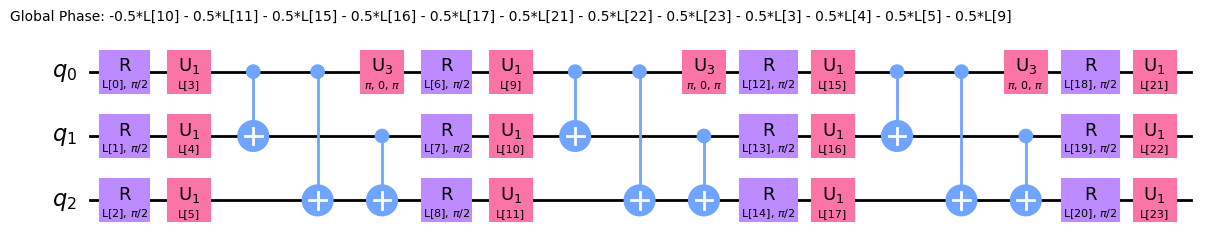

In [11]:
variational_circuit_circuit = variational_circuit()
variational_circuit_circuit.decompose().draw(output='mpl', style='clifford')

In [ ]:
variational_circuit_circuit.depth()

In [12]:

cls_opt = COBYLA(maxiter=50, tol=0.001)

In [13]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals))
    , objective_func_vals)
    plt.show()

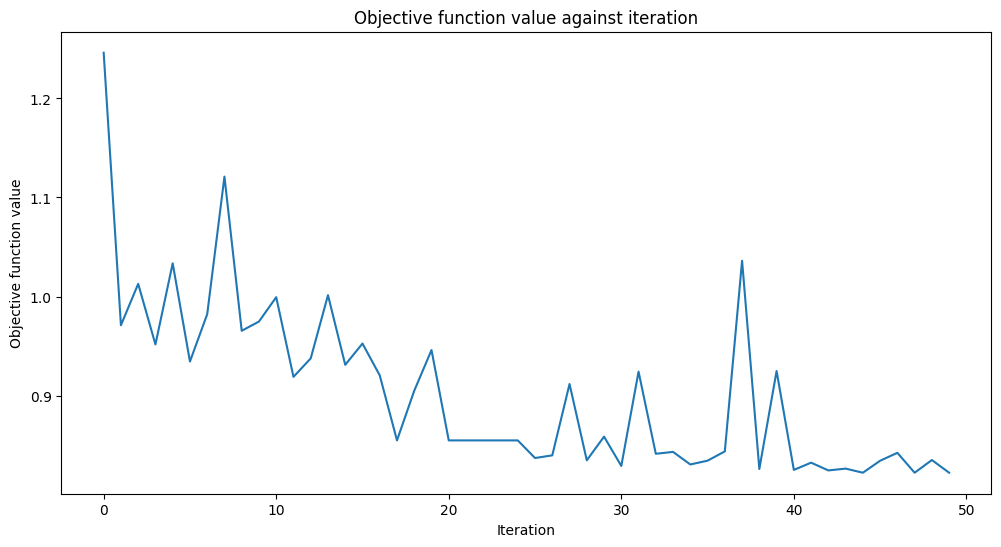

Training time: 80 seconds


In [14]:
import feature_map, variational_circuit

vqc = VQC(
    sampler = sampler,
    num_qubits = num_qubits,
    feature_map=feature_map_circuit,
    ansatz=variational_circuit_circuit,
    optimizer=cls_opt,
    callback=callback_graph,
    loss='cross_entropy',
)

objective_func_vals = []

start = time.time()
vqc.fit(x_train, y_train)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

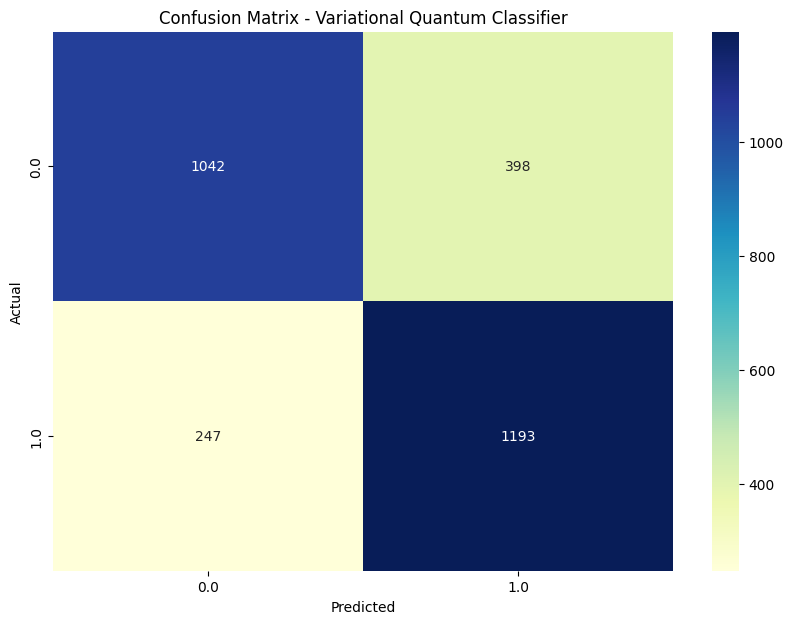

Accuracy = 77.60416666666666
F1 Score = 77.54243163867109


In [15]:
result = vqc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)


df_cm = pd.DataFrame(conf_mat, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix - Variational Quantum Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

vqc_score = accuracy_score(y_test, result) * 100

print('Accuracy =', vqc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') *  100)

In [16]:
feature_map_circuit.depth()

30

In [17]:
variational_circuit_circuit.decompose().depth()

17

In [18]:
train_score_q2_ra = vqc.score(x_train, y_train)
test_score_q2_ra = vqc.score(x_test, y_test)

print(f"EstimatorQNN on the training dataset using TwoLocal: {train_score_q2_ra:.2f}")
print(f"EstimatorQNN on the test dataset using TwoLocal:     {test_score_q2_ra:.2f}")

EstimatorQNN on the training dataset using TwoLocal: 0.79
EstimatorQNN on the test dataset using TwoLocal:     0.78
